# Bank's Deposit Prediction

### Problem Statement:-
Une banque portugaise souhaite lancer une campagne de marketing direct par appels téléphoniques pour promouvoir son produit de dépôt à terme. Le dépôt à terme est un produit financier où les clients placent une somme d'argent pour une période déterminée en échange d'un taux d'intérêt fixe. La banque vise à augmenter le nombre de souscriptions à ce produit grâce à cette campagne téléphonique. L’objectif de la campagne vise à prédire si un client souscrira ou non aux dépôts à terme de l’'institution bancaire. 
Le dépôt à terme est essentiel dans le secteur financier car il permet d'optimiser les stratégies marketing et de renforcer l'engagement des clients en ne ciblant que les potentiels. Nous analysons ici les données marketing d'une institution bancaire portugaise basées les enregistrements des appels téléphoniques de leur dernière campagne marketing. Ces derniers enregistrements sont disponibles sous la forme d’un ensemble de données.

### Project Objective :-
Notre objectif est d'identifier les caractéristiques des clients les plus susceptibles d’influencer leur choix de souscrire à des dépôts à terme et de déployer des modèles de prédiction capables de prévoir les résultats avec exactitude.

### Dataset :-
Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. L'ensemble de données utilisé dans ce projet provient de l'ensemble de données Bank Marketing créé par S. Moro, P. Rita et P. Cortez à l'Iscte - Institut universitaire de Lisbonne. Parmi les quatre ensembles de données disponibles, nous avons utilisé bank-full.csv qui contient 21 variables fournissant des informations sur 41188 clients.20 variables prédictives et y qui la variable cible.

Pour plus d'informations sur l'ensemble de données utilisé, reportez-vous à https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Project Work flow :-

    .Installations et Mise à jour
    .Import the necessary librairies
    .Data description
    .Data cleaning


# Import the necessary librairies

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# For plotting (visualisation)
import matplotlib.pyplot as plt
import seaborn as sns

# To sample datasets
from sklearn.utils import resample

#
from sklearn.impute import SimpleImputer

# Data description

In [2]:
# Loading the dataset
bank_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')
# Displays the dataset charactéristics
bank_df.info()
# To display all columns in the dataset.
pd.set_option('display.max_columns', None)
# Display the dimensions of the data.
bank_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_17572\3127533405.py:2: SyntaxWarning: invalid escape sequence '\B'
  bank_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')


(41188, 21)

In [3]:
# Display first 5 rows 
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Display the last 5 rows
bank_df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# Display the randomly 5 rows
bank_df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18119,33,student,married,high.school,no,no,no,cellular,jul,wed,622,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
30047,60,blue-collar,married,professional.course,no,yes,no,cellular,apr,wed,545,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
29621,36,technician,single,professional.course,unknown,yes,no,cellular,apr,mon,59,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
15164,43,blue-collar,married,basic.4y,no,yes,no,cellular,jul,thu,377,11,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
11232,47,management,married,basic.9y,unknown,unknown,unknown,telephone,jun,thu,282,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


Notre Dataset comprend 21 variables fournissant des informations sur 41188 clients. 20 variables prédictives, dont 10 variabbles numériques et 10 variables catégorielles et y; la variable cible. La mémoire utilisée par le DataFrame est de 6.6+ MB. Les différentes variables sont les suivantes : 

### Bank client data:

1 - Age : It's meanning the client age.

2 - Job : The client type job; There are 12 types job including unknown.

3 - Marital : Marital refers to client's marital status. There are 4 types of marital status including unknown.

4 - Education : Education refers to client's education levels.

5 - Default: which indicates if the client has credit in default or not. However, some client did not specify if they have credit or not.

6 - Housing: which indicates if the client has housing loan or not. However, some client did not specify if they have housing loan or not.

7 - Loan: which indicates if the client has personal loan or not. However, some client did not specify if they have personal loan or not.

### Related with the last contact of the current campaign:

8 - Contact: The type of communication used to contact clients. 

9 - Month: The client last contact month of year.

10 - Day_of_week: The client last contact day of the week.

11 - Duration: The duration of the last contact with the customer in seconds.

### Other attributes:

12 - Campaign: The number of contacts performed during this campaign for this client.

13 - Pdays: The number of days since the customer was last contacted in a previous campaign. 

14 - Previous: The number of times this customer was called before this campaign.

15 - Poutcome: The outcome of the previous marketing campaign for this customer. 

### Social and economic context attributes

16 - Emp.var.rate: The client employment variation rate.

17 - Cons.price.idx: The client consumer price index .     

18 - Cons.conf.idx: The client consumer confidence index.    

19 - Euribor3m: euribor 3 month rate of custumers

20 - Nr.employed: number of employees. 

### Output variable (desired target):

21 -Deposit(y) : if the client has subscribed to a term deposit (yes or no)

In [6]:
# check the duplicate rows
bank_df.duplicated().sum()

12

There are 12 duplicated rows. So lest's handle their.

In [7]:
# Drop the duplicated rows
bank_df = bank_df.drop_duplicates()

In [11]:
# check the duplicate rows
bank_df.duplicated().sum()

0

<Axes: >

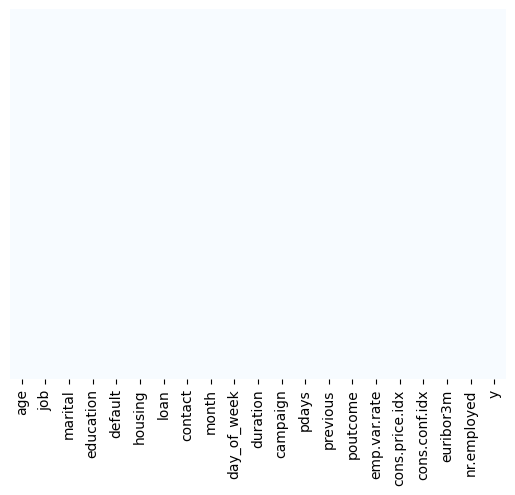

In [9]:
# Let's check if you have any missing data with visualisation
sns.heatmap(bank_df.isnull(), cmap='Blues', cbar=False, yticklabels=False)

There are no missing values ​​in the dataset.

In [46]:
# Let's visualize the distribution of all variables
bank_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.0,NaN,NaN,NaN,40.0238,10.42068,17.0,32.0,38.0,47.0,98.0
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41176,2,cellular,26135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Définir une fonction pour afficher toutes les valeurs uniques de chaque colonne
def display_unique_values(dataframe):
    unique_values_dict = {}
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        unique_values_dict[column] = unique_values
    return unique_values_dict

# Définir une fonction pour compter l'occurrence des valeurs pour chaque colonne
def count_value_occurrences(dataframe):
    value_counts_dict = {}
    for column in dataframe.columns:
        value_counts_dict[column] = dataframe[column].value_counts()
    return value_counts_dict


# Utiliser la fonction pour obtenir les valeurs uniques
unique_values_dict = display_unique_values(bank_df)
value_counts_dict = count_value_occurrences(bank_df)

# Afficher les valeurs uniques et les occurrences des valeurs pour chaque colonne
for column in bank_df.columns:
    print(f"Valeurs uniques pour la colonne '{column}':")
    print(unique_values_dict[column])
    print("\nOccurrences des valeurs pour la colonne '{column}':")
    print(value_counts_dict[column])
    print("\n")

Valeurs uniques pour la colonne 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Occurrences des valeurs pour la colonne '{column}':
age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64


Valeurs uniques pour la colonne 'job':
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

Occurrences des valeurs pour la colonne '{column}':
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired 

In [72]:
# Affichons le taux d'appels pour les clients
pd.crosstab(bank_df['previous'], bank_df['campaign'], normalize='index')

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,42,43,56
previous,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.415825,0.252820,0.134202,0.066890,0.041012,0.024528,0.016343,0.010351,0.007679,0.006160,0.004894,0.003460,0.002532,0.001941,0.001406,0.001406,0.001631,0.000928,0.000731,0.000844,0.000675,0.000478,0.00045,0.000422,0.000225,0.000225,0.000309,0.000225,0.000281,0.000197,0.000197,0.000113,0.000113,0.000084,0.000141,0.000028,0.000028,0.000056,0.000028,0.000056,0.000056,0.000028
1,0.504714,0.281517,0.099540,0.048454,0.025214,0.020610,0.008989,0.006358,0.001973,0.001096,0.000439,0.000439,0.000219,0.000000,0.000219,0.000219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.517241,0.275862,0.107427,0.046419,0.029178,0.007958,0.006631,0.003979,0.001326,0.001326,0.001326,0.000000,0.001326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.504630,0.282407,0.106481,0.064815,0.013889,0.023148,0.004630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.514286,0.314286,0.100000,0.028571,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.611111,0.166667,0.166667,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.400000,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The pdays column contains values of 999, which indicate that certain customers were not contacted previously as part of the bank's marketing campaign.

The dataset includes 35551 new customers, as evidenced by the value of 0 in the previous column, which justifies the 'unknown' result of the variable 'poutcome'.

With these new customers only 41.5% were contacted for the first time for this campaign.

<Axes: xlabel='y', ylabel='count'>

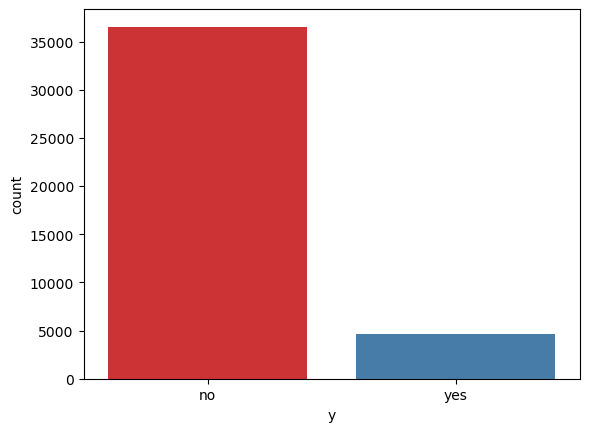

In [15]:
# Let' visualize the target distribution
sns.countplot(data=bank_df, x='y', palette='Set1')

Nous voyons que la variable cible est binaire catégorielle et que les données sont asymétriques. Nous utilisons la technique de sous-échantillonnage de la classe majoritaire pour améliorer cela.

In [16]:
# Make a copy of dataframe
d1=bank_df.copy()
# Separation of majority and minority classes
# Séparation des classes majoritaire et minoritaire
d2 = d1[d1.y=='yes']
d3= d1[d1.y=='no']

df_majority_downsampled = resample(d3, 
                                   replace=False,    # Échantillonnage sans remplacement
                                   n_samples=len(d2),  # Nombre d'échantillons égal à la classe minoritaire
                                   random_state=42)  # Reproductibilité
# Combinaison des échantillons minoritaires et sous-échantillonnés
da_bank = pd.concat([df_majority_downsampled, d3])
# Mélange des données pour éviter tout ordre biaisé
df_balanced = da_bank.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: xlabel='y', ylabel='count'>

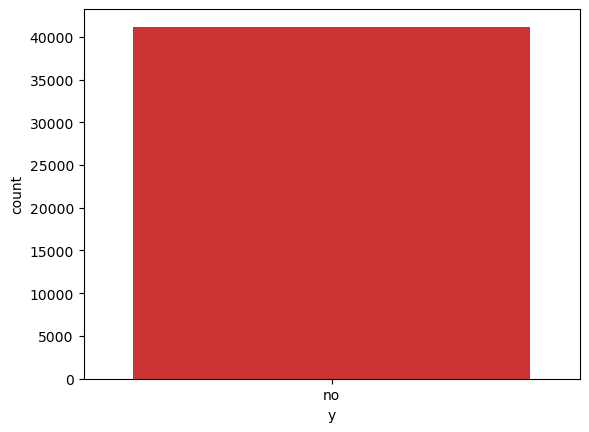

In [17]:
# Visualization of the new distribution
# Visualisation de la nouvelle distribution
sns.countplot(data=da_bank, x='y', palette='Set1')

# Data cleaning

Identifions les variables catégorielles et numériques.

In [75]:
# Make dataframe copy
data_df = bank_df.copy()
# Identifions les variables numériques ou Filtrer ou selectiooner les colonnes numériques 
num_vars = bank_df.select_dtypes(include=['number']).columns
# Identifions les variables catégorielles
cat_vars = [var for var in bank_df.columns if var not in num_vars]
# Cast all variables as categorical
bank_df[cat_vars] = bank_df[cat_vars].astype('category')
# check the data types of all columns
print(bank_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41174 non-null  float64 
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  float64 
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4